## Загружаем и выводим тестовое изображение

In [4]:
import numpy as np
from scipy import misc
img = misc.face()

In [8]:
# TODO: где же Лена? анализируем размерность изображения, визуализируем отдельно кажждый канал

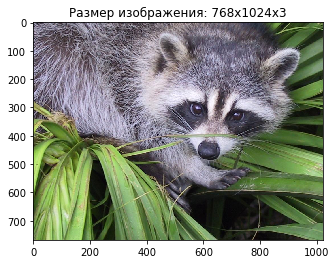

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img)
plt.title('Размер изображения: %dx%dx%d' % img.shape)

## Функции создания ядер

In [9]:
def gauss_kernel(ksize = 5, sigma = 2.5):
    """ Возвращает гауссовское ядро размера ksize и дисперсией sigma """
    # ksize - размер ядра
    # sigma - дисперсия (ширина фильтра)
    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    e = np.float32((xx**2 + yy**2) / (2. * sigma**2))
    kernel = 1. / (sigma * np.sqrt(2. * np.pi)) * np.exp(-e)
    return kernel / np.sum(kernel)

def laplace_kernel(ksize = 5, sigma = 2.5):
    """ Возвращает ядро Лапласа размера ksize и дисперсией sigma """
    # ksize - размер ядра
    # sigma - дисперсия (ширина фильтра)
    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    e = np.float32((xx**2 + yy**2) / (2. * sigma**2))
    kernel = 1. / (np.pi * sigma**4) * (1. - e) * np.exp(-e)
    return kernel / np.sum(kernel)

kernels = {'gauss': gauss_kernel, 
           'laplace': laplace_kernel}

## Визуализация ядер

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_kernel(kernel_type, ksize, sigma):
    kernel = kernels[kernel_type](ksize, sigma)
    r = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(r, r)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, kernel, 
                    cmap=plt.cm.coolwarm,
                    linewidth=0, antialiased=True)
    plt.title('%s ksize=%s sigma=%.3f' % (kernel_type, ksize, sigma))
    return plt.show()

In [11]:
from ipywidgets import interact
interact(show_kernel, 
         kernel_type = kernels.keys(),
         ksize = (1, 20, 1),
         sigma = (1e-3, 10, 0.1))

<function __main__.show_kernel>

## Фильтрация изображения

In [12]:
from scipy import signal

def filter_img(kernel_type, ksize = 5, sigma = 2.5):
    kernel = kernels[kernel_type](ksize, sigma)
    img = np.float32(misc.face())
    # if kernel_type == 'laplace':
    #    img = np.resize(img[:,:,0], (img.shape[0], img.shape[1], 1))
    filtered = np.zeros_like(img)
    for i in range(img.shape[-1]):
        filtered[:,:,i] = signal.convolve2d(img[:,:,i], kernel, boundary='symm', mode='same')
        filtered[:,:,i] = np.abs(filtered[:,:,i])
        filtered[:,:,i] = 255. * filtered[:,:,i] / np.max(filtered[:,:,i])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #cmap = plt.cm.gray if kernel_type=='laplace' else plt.cm.brg
    cmap = plt.cm.brg
    ax.imshow(np.squeeze(np.uint8(filtered)), cmap=cmap)
    plt.title('%s ksize=%s sigma=%.3f' % (kernel_type, ksize, sigma))
    return plt.show()

In [14]:
interact(filter_img, 
         kernel_type = kernels.keys(),
         ksize = (1, 20, 1),
         sigma = (1e-3, 10, 0.1))

<function __main__.filter_img>

## Медианный фильтр

In [55]:
def median_filter(img, ksize):
    result = np.zeros_like(img)
    for channel in range(img.shape[-1]):
        for x in range(img.shape[1]):
            for y in range(img.shape[0]):
                # определяем текущее положение окна в координатах изображения
                l = int(max(0, x - ksize // 2 + 1.))
                r = int(min(img.shape[1], x + ksize // 2 + 1.))
                t = int(max(0, y - ksize // 2 + 1.))
                b = int(min(img.shape[0], y + ksize // 2 + 1.))
                # TODO: вычислить медиану в окрестности х, y для окна размера ksize
    return result

### Добавляем случайный шум на изображение

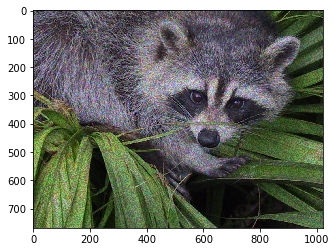

In [52]:
img = misc.face()
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img)

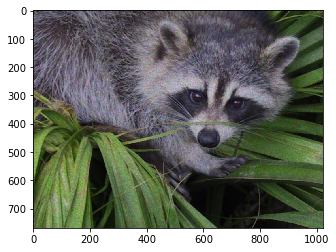

In [57]:
plt.imshow(median_filter(noisy_img, 5))

### Применяем медианный фильтр

In [53]:
def interact_median_filter(ksize=5):
    denoised = median_filter(noisy_img, ksize)
    return plt.imshow(denoised)

## Фильтр Собеля

In [15]:
# оператор собеля для вычисления X и Y составляющих градиента

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

In [20]:
def sobel_filter(img):
    """ Вычисляем компоненты вектора градиента """

    img_float = np.float32(img)
        
    result_x = np.zeros_like(img_float)
    result_y = np.zeros_like(img_float)
    
    # применяем для каждого канала отдельно
    for channel in range(img_float.shape[-1]):
        
        # сворачиваем оператор с исходным изображением
        
        result_x[:,:,channel] = signal.convolve2d(
                                    img_float[:,:,channel],
                                    sobel_x, mode='same')
        
        result_y[:,:,channel] = signal.convolve2d(
                                    img_float[:,:,channel],
                                    sobel_y, mode='same')
   
    return result_x, result_y

In [ ]:
# TODO: собрать грабли с целым беззнаковым

In [31]:
# получаем компоненты градиента изображения для каждого пикселя
grad_x, grad_y = sobel_filter(misc.face())

In [32]:
# вычисляем длину вектора градиента
grad = np.sqrt(grad_x**2 + grad_y**2)

### Результат применения оператора Собеля

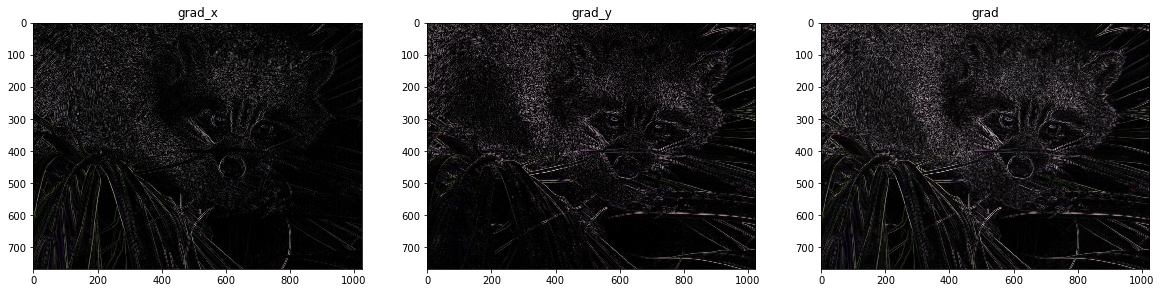

In [44]:
def normalize(img):
    """ Нормируем матрицу в 0..1 по каждому каналу """
    result = np.zeros_like(img)
    for channel in range(result.shape[-1]):
        result[:,:,channel] = np.abs(img[:,:,channel]) / np.max(np.abs(img[:,:,channel]))
    return result

# выводим компоненты и результирующий вектор

imgs = [grad_x, grad_y, grad]
titles = ['grad_x', 'grad_y', 'grad']

fig = plt.figure(figsize=(20, 10))
for i, g in enumerate(imgs, 0):
    subplot = fig.add_subplot(1, 3, i + 1)
    plt.imshow(normalize(g));
    plt.title(titles[i])